### Theis no-flow boundary interpretation.  
This is a demo of the interpretation of a pumping test in a confined
aquifer with an impermeable boundary with the Theis solution. 

Copyright 1998-2007 - Philippe Renard & Co. - GNU GENERAL PUBLIC LICENSE

## Load the data
The data set for this example has been typed from: 
G. de Marsily, Pumping test in Niger.

In [3]:
import hypy as hp
import matplotlib.pyplot as plt

 The data is stored in the ascii file 'thn_ds1.txt' that contains two columns as we can see if we edit the data file with the command edit. The first column is the time in seconds. The second column contains the drawdown in meters.

Let us now load the data in the python workspace with the ldf function from hytool. This allows to create two vectors: t and s containing the data. We will use them in the next steps, but we can first plot them to check graphicaly that they have been correctly loaded.

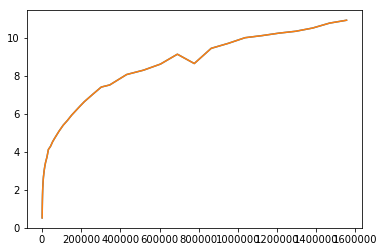

In [5]:
t,s = hp.ldftxt('thn_ds1.txt')
plt.plot(t,s)
plt.show()

# Diagnostic plot

In order to display the diagnostic plot of the data, we use the function diagnostic(t,s) provided by hytool.


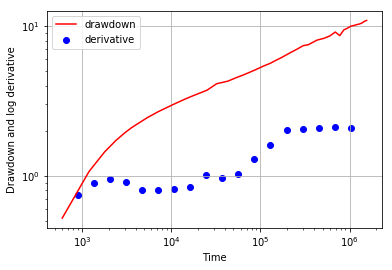

In [4]:
hp.diagnostic(t,s)

The diagnostic plot shows a doubling of the derivative at a time of 1e5
seconds indicating a possible no-flow boundary effect. We interpret the
data with the thn model.

Model parameter guess
The parameters allowing to control the Theis no-flow boundary model are the slope
and intercept of the Jacob straight line that one can observe at
intermediate time, and the time at which the slope of straight line
doubles.
 
The function thn_gss allows to estimate these numbers, we then check
with trial if the first guess is acceptable.

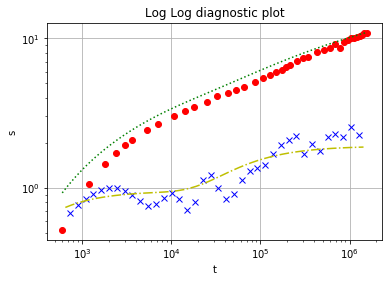

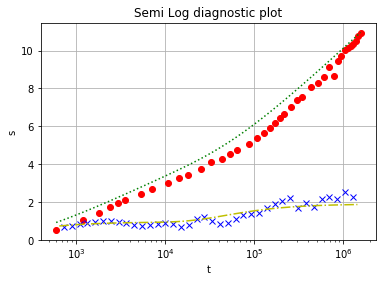

In [5]:
p0 = hp.thn.gss(t,s)
hp.trial(p0,t,s,'thn')

Model fit and report
As the first guess was rather good, we proceed with the automatic fit and
directly report the results of the interpretation.

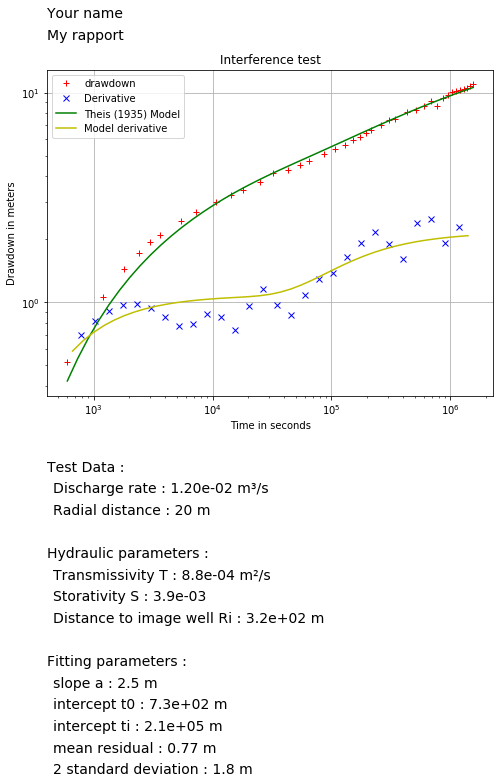

In [6]:
p = hp.fit(p0,t,s,'thn')
q = 0.012 #pumping rate in m3/s
r = 20 #radial distance in m
d = [q,r]

hp.thn.rpt(p,t,s,d,'thn',Author='Your name',ttle = 'Interference test', Rapport = 'My rapport', filetype = 'pdf')

The estimated transmissivity is 9.8e-4 m2/s, the storativity is
3.9e-3, and the distance to the image well is 310 m. These numbers are
close to the estimation provided by de Marsily.

T  = 1.0e-3 [m2/s]

S  = 3.7 e-3

Ri = 287 m